# Soal 1. Menentukan jenis data categorical atau numeric
Jelaskan data kategorikal (kualitatif) dan data numerik (kuantitatif)



Jawab disini:

Data kategorikal merupakan data yang mencerminkan karakteristik seperti bahasa, jenis kelamin seseorang, warna rambut seseorang atau nilai numerik bulat yang tidak memiliki makna matematis seperti 1 untuk laki-laki dan 0 untuk perempuan. Data kategorikal terbagi menjadi dua yaitu nominal (data kategori yg tidak memiliki rangking. ex: jenis kelamin)dan ordinal (data kategori yg memiliki rangking. ex: juara kelas)

---
Data numerik merupakan data numerik yang memiliki makna matematis seperti umur, berat badan dan lain2. Data numerik terbagi menjadi dua yaitu diskrit(hasil perhitungan. contoh: jumlah penumpang) dan kontinu (hasil pengukuran. contoh: berat badan, tinggi badan)


---



---



Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=19Yc404D3U3OPPoUP8J1pXETlTmA4hOOX)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,12/21/2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,12/22/2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,12/23/2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,12/24/2013,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,12/25/2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   object
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [4]:
df = df.sample(1000)

<h2>Soal 2. Visualisasi Scatter Plot dengan memiliki missing value </h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' dan 'na' yang dianggap sebagai missing value,  namun data ini tidak bisa di ubah ke bentuk float, maka ubahlah data tersebut menjadi NaN dengan menambahkan argumen na_values=['na', '-'] saat menggunakan atribut pd.read_csv('nama file.csv'. na_values=..]
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

a. Buahlah visualisasi scatter plot menggunakan sample(1000), sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


b. Kemudian bandingkan data visualisasi diatas dengan visualisasi data (sample=1000) setelah handling missing value menggunakan:
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

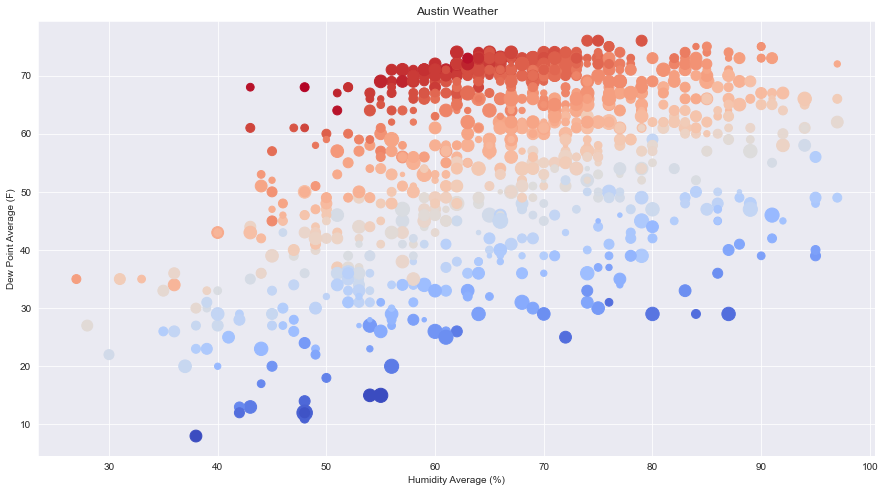

In [55]:
# cleansing
df1 = pd.read_csv('austin_weather.csv', na_values=['na','-']) # membaca file dengan na_values
df1.astype('float', errors = 'ignore').dtypes # mengubah  tipe data ke float
df1 = df1.sample(1000) #mengubah menjadi 1000 sample

# membuat visualisasi
ukuran = df1['WindAvgMPH']*20
plt.figure(figsize=(15,8))
plt.scatter(df1['HumidityAvgPercent'], df1['DewPointAvgF'], c=df1['TempAvgF'], s=ukuran, cmap='coolwarm')

#set title dan label
plt.xlabel('Humidity Average (%)')
plt.ylabel('Dew Point Average (F)')
plt.title('Austin Weather')

plt.show()

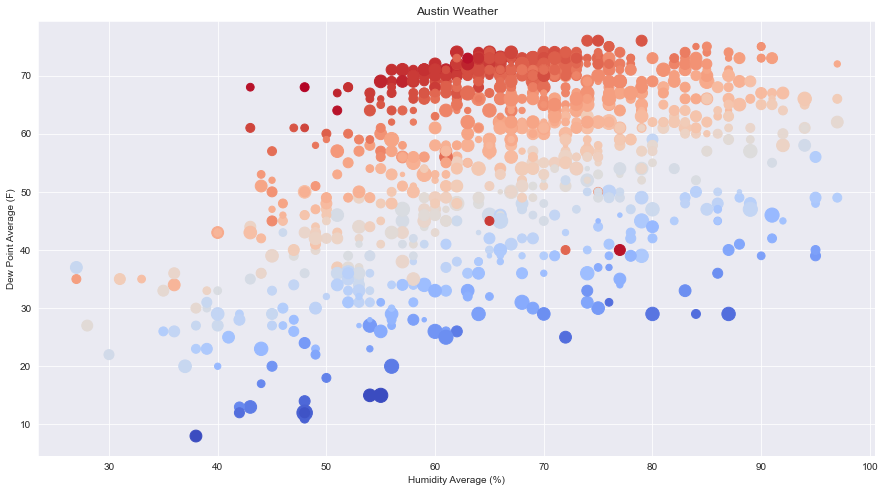

In [62]:
df3=df1.fillna(method='ffill')
# membuat visualisasi
ukuran = df3['WindAvgMPH']*20
plt.figure(figsize=(15,8))
plt.scatter(df3['HumidityAvgPercent'], df3['DewPointAvgF'], c=df3['TempAvgF'], s=ukuran, cmap='coolwarm')

#set title dan label
plt.xlabel('Humidity Average (%)')
plt.ylabel('Dew Point Average (F)')
plt.title('Austin Weather')

plt.show()

#                     **Expected output**

#                     **Tanpa Handling missing value**

![tanpa handling missing value](https://drive.google.com/uc?id=1FYJkCwAfm8f3jyNdzOnCvp15hS_DixHr)

##                    **Dengan Handling missing value**
![dengan handling missing value](https://drive.google.com/uc?id=1nqZuPdBsqSsOud-_XuBGujDAcJWEEvIr)

Analisa :

Download [price.csv](https://drive.google.com/uc?export=download&id=1LfuQmLb8AZxAvJzgWJ3u4h49EoTGqO-R)

In [100]:
df2 = pd.read_csv('price.csv')
df2.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


---

<h2>Soal 3. Visualisasi Data with Handling outliers </h2>

Pada tugas kali ini, kita akan melakukan handling outliers. Outliers ditemukan pada kolom 'House_Price' dengan menggunakan boxplot dari library seaborn seperti gambar berikut: 


![boxplot1](https://drive.google.com/uc?id=1y2jRwf8zRPXQtSBkmjJLcqUm4l6DR7d9)


Dengan menggunakan Interquartile range, kita bisa temukan nilai data outliers dan meremove data outlier tersebut. 

*   Tentukan nilai batas atas dan batas bawah dari Interquartile range tersebut
*   Remove data outliers tersebut menggunakan batas atas dan batas bawah
*   Visualisasikan hasil data yang sudah d remove outliers seperti expected berikut:







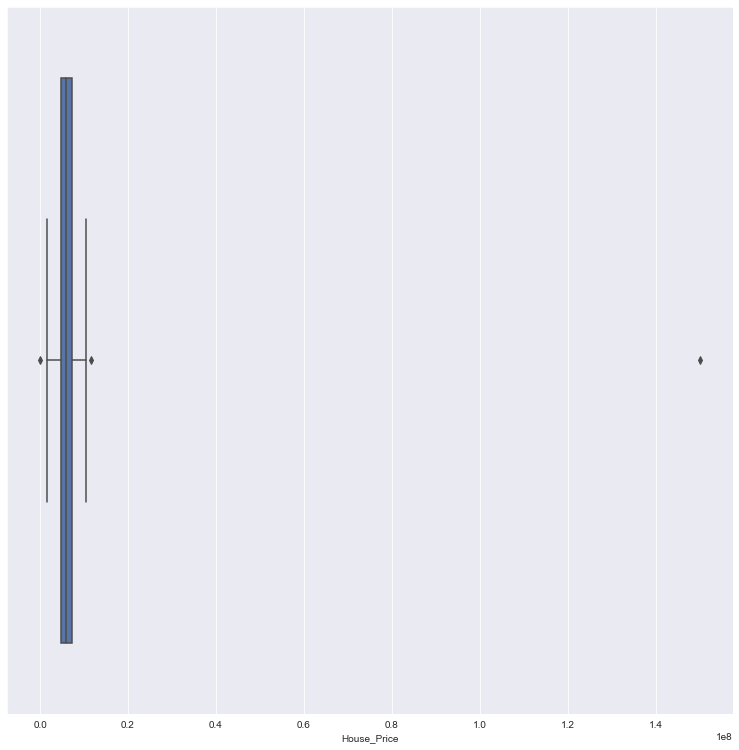

In [68]:
import seaborn as sns

sns.set({'figure.figsize':(13,13)})
sns.boxplot(x='House_Price', data= df2)
plt.show()

In [134]:
# import scipy.stats

# def get_lower_upper_bound (x):
#     q1 = np.percentile(x,25)
#     q3 = np.percentile(x,75)
#     iqr = q3-q1
#     lower_bound = q1-(iqr*1.5)
#     upper_bound = q3+(iqr*1.5)
#     return lower_bound, upper_bound

# def get_outliers_iqr(x):
#     lower_bound, upper_bound = get_lower_upper_bound(x)
#     return x[np.where((x > upper_bound)|(x < lower_bound))]

# get_outliers_iqr(df2['House_Price'].values)

Q1=df2['House_Price'].quantile(0.25)
Q3=df2['House_Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

print(lower_bound,upper_bound)

df2['House_Price']=df2[(df2['House_Price']>lower_bound)&(df2['House_Price']<upper_bound)]


sns.set({'figure.figsize':(13,13)})
sns.boxplot(x='House_Price', data= df2)
plt.show()

871625.0 10976625.0


ValueError: Columns must be same length as key

In [117]:
len(df2[(df2['House_Price']>lower_bound)&(df2['House_Price']<upper_bound)])

933

**EXPECTED OUTPUT:**

Batas bawah & batas atas:

871625.0 10976625.0

Visualisasi boxplot:

![boxplot2](https://drive.google.com/uc?id=1qZc-lEa5FUzSQ_cyt4_GJQ0TZ8c6WjHX)



